# Merge datasets for EDA:
--------------

### Vaccination rate 

### Covid-19 severity

### Hesitancy & SVI

### 2020 Election results

### PVI data

### Covid19 health disparity data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base = os.path.split(os.getcwd())[0]
dd = base + '/data/clean'

In [3]:
vacc = pd.read_csv('{}/vaccination_rate_US.csv'.format(dd))
cov19 = pd.read_csv('{}/covi19_death_cases.csv'.format(dd))
hesit = pd.read_csv('{}/Hesitancy_SVI_Ethnicity.csv'.format(dd))
elect = pd.read_csv('{}/election_results_us.csv'.format(dd))
pvi_d = pd.read_csv('{}/PVI_05_Oct_data_clean.csv'.format(dd))
pvi_m = pd.read_csv('{}/PVI_05_Oct_results_clean.csv'.format(dd))
disp = pd.read_csv(dd + '/covid19_heath_disparity.csv')

In [4]:
vacc.Name_df = 'vacc' 
cov19.Name_df = 'cov19'
hesit.Name_df = 'hesit'
elect.Name_df = 'elect'
pvi_d.Name_df = 'pvi_d'
pvi_m.Name_df = 'pvi_m'
disp.Name_df = 'disp'

## FIPS codes in `vacc`, `cov19`, `hesit`, `elect`, `pvi_d`

`pvi_m` - fips to be added

In [5]:
for data in (vacc, cov19, hesit, elect, pvi_d, disp, pvi_m):
    
    if 'fips' in data.columns:
        print('fips codes in {}'.format(data.Name_df))
        print()
    else:
        print('No fips codes in {}'.format(data.Name_df))
        print()

fips codes in vacc

fips codes in cov19

fips codes in hesit

fips codes in elect

fips codes in pvi_d

fips codes in disp

No fips codes in pvi_m



### Variables in each df

In [6]:
datasets = [vacc, cov19, hesit, elect, pvi_d, disp, pvi_m]

for data in datasets:
    print(data.Name_df)
    print(data.columns.tolist())
    print('Number of variables: ', len(data.columns))
    print()

vacc
['fips', 'state', 'county', 'state_abb', 'popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per', 'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per']
Number of variables:  12

cov19
['fips', 'state', 'county', 'state_abb', 'popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per', 'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per', 'county_cases', 'cases_031021', 'county_death', 'death_031021', 'pop_census', 'test', 'cases_prop', 'death_prop']
Number of variables:  20

hesit
['fips', 'Estimated hesitant', 'Estimated hesitant or unsure', 'Estimated strongly hesitant', 'Social Vulnerability Index (SVI)', 'SVI Category', 'CVAC level of concern for vaccination rollout', 'CVAC Level Of Concern', 'Percent Hispanic', 'Percent non-Hispanic American Indian/Alaska Native', 'Percent non-Hispanic Asian', 'Percent non-Hispanic Black', 'Percent non-Hispanic Native Hawaii

###  `fips` in each df:

In [7]:
for data in datasets[:-1]:
    print('{} fips in {}, of which NaNs {}'.format(data['fips'].shape[0], 
                                                   data.Name_df,
                                                   data['fips'].isnull().sum()))

3216 fips in vacc, of which NaNs 0
3216 fips in cov19, of which NaNs 0
3142 fips in hesit, of which NaNs 0
3152 fips in elect, of which NaNs 0
3142 fips in pvi_d, of which NaNs 0
3142 fips in disp, of which NaNs 0


In [8]:
cov19_hesit = sorted(list(set(cov19['fips'].tolist()) ^ set(hesit['fips'].tolist())))
cov19_elect = sorted(list(set(cov19['fips'].tolist()) ^ set(elect['fips'].tolist())))
cov19_pvi_d = sorted(list(set(cov19['fips'].tolist()) ^ set(pvi_d['fips'].tolist())))

----------
### `cov19` already has the vaccination rate `outcome`, so drop `vacc`

In [9]:
cov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 20 columns):
fips                    3216 non-null int64
state                   3216 non-null object
county                  3216 non-null object
state_abb               3216 non-null object
popfull_per             3208 non-null float64
pop_full_12plus_per     3163 non-null float64
pop_full_18plus_per     2954 non-null float64
pop_full_65plus_per     3208 non-null float64
pop_first_per           2813 non-null float64
pop_first_12plus_per    2935 non-null float64
pop_first_18plus_per    2726 non-null float64
pop_first_65plus_per    2980 non-null float64
county_cases            3215 non-null object
cases_031021            3215 non-null float64
county_death            3215 non-null object
death_031021            3215 non-null float64
pop_census              3215 non-null float64
test                    3216 non-null int64
cases_prop              3215 non-null float64
death_prop              3215

- `cases` - 27 counties report 0 cases - NaN - Utah (22), Alaska (3), Massacgusetts (2)
- `death` - 133 counties report 0 death cases - how to confirm? States include:
 
- assuming that the change of 0 deaths in US counties over the pandemic is very low, assinging 0s to NaN!

In [10]:
cov19['death_031021'].replace(0, np.nan, inplace = True)
cov19['cases_031021'].replace(0, np.nan, inplace = True)

In [11]:
cov19.isnull().sum()

fips                      0
state                     0
county                    0
state_abb                 0
popfull_per               8
pop_full_12plus_per      53
pop_full_18plus_per     262
pop_full_65plus_per       8
pop_first_per           403
pop_first_12plus_per    281
pop_first_18plus_per    490
pop_first_65plus_per    236
county_cases              1
cases_031021             28
county_death              1
death_031021            134
pop_census                1
test                      0
cases_prop                1
death_prop                1
dtype: int64

In [12]:
cov19[cov19['cases_031021'].isnull()]['state'].value_counts()

Utah             22
Alaska            3
Massachusetts     2
Guam              1
Name: state, dtype: int64

In [13]:
cov19[cov19['death_031021'].isnull()]['state'].value_counts()

Puerto Rico      78
Utah             22
Nebraska          9
Alaska            8
Massachusetts     2
Colorado          2
Texas             2
California        2
Nevada            2
North Dakota      2
Minnesota         1
Guam              1
Washington        1
Idaho             1
South Dakota      1
Name: state, dtype: int64

### Drop some columns:

In [14]:
cov19_f = cov19.drop(['county_cases','county_death','test'], axis = 1)

In [15]:
new_cols = {'cases_031021': 'cases_no',
            'death_031021': 'death_no'}

cov19_f.rename(columns = new_cols, inplace = True)

In [16]:
cov19_f.head(n = 3)

,fips,state,county,state_abb,popfull_per,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per,cases_no,death_no,pop_census,cases_prop,death_prop
0,1001,Alabama,Autauga County,AL,34.0,39.9,41.8,61.7,43.1,50.6,52.6,74.5,9780.0,142.0,55869.0,17.505235,0.254166
1,1003,Alabama,Baldwin County,AL,42.7,49.5,51.9,75.3,54.4,63.0,65.7,91.1,36579.0,518.0,223234.0,16.385945,0.232044
2,1005,Alabama,Barbour County,AL,35.7,41.1,43.0,66.1,46.6,53.8,56.0,76.3,3519.0,71.0,24686.0,14.255043,0.287612


---------------

## Merge `cov19_f` with `Hesitancy_SVI_Ethnicity.csv`:

#### Merge `left` to ensure outcome is there?

In [17]:
print(cov19_f.columns)
print(hesit.columns)

Index(['fips', 'state', 'county', 'state_abb', 'popfull_per',
       'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per',
       'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per',
       'pop_first_65plus_per', 'cases_no', 'death_no', 'pop_census',
       'cases_prop', 'death_prop'],
      dtype='object')
Index(['fips', 'Estimated hesitant', 'Estimated hesitant or unsure',
       'Estimated strongly hesitant', 'Social Vulnerability Index (SVI)',
       'SVI Category', 'CVAC level of concern for vaccination rollout',
       'CVAC Level Of Concern', 'Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White'],
      dtype='object')


In [18]:
df = pd.merge(cov19_f, hesit, how = 'left', on = 'fips')
df.isnull().sum()

fips                                                       0
state                                                      0
county                                                     0
state_abb                                                  0
popfull_per                                                8
pop_full_12plus_per                                       53
pop_full_18plus_per                                      262
pop_full_65plus_per                                        8
pop_first_per                                            403
pop_first_12plus_per                                     281
pop_first_18plus_per                                     490
pop_first_65plus_per                                     236
cases_no                                                  28
death_no                                                 134
pop_census                                                 1
cases_prop                                                 1
death_prop              

### Missing data from `Hesitancy_SVI_Ethnicity.csv`:

- `Hesitancy data` - `Guam` & `Puerto Rico`
- `SVI` data -  `Guam` & `Puerto Rico` & `New Mexico (Rio Arriba County)`

In [19]:
set(df[df['Estimated hesitant'].isnull()]['state'].tolist())
set(df[df['SVI Category'].isnull()]['state'].tolist())

{'Guam', 'New Mexico', 'Puerto Rico'}

In [20]:
df[(df['SVI Category'].isnull()) & (df['state'] == 'New Mexico')]['county']

1812    Rio Arriba County
Name: county, dtype: object

---------------

## Merge `cov19_f` + `Hesitancy_SVI_Ethnicity.csv` with `election_results_us.csv`

#### Merge `left` to ensure outcome is there?

In [21]:
elect.columns

Index(['fips', 'state', 'county', 'votes_dem', 'votes_gop', 'total_votes',
       'per_dem', 'per_gop', 'per_point_diff'],
      dtype='object')

In [22]:
df = pd.merge(df, elect.drop(columns = ['state', 'county']), how = 'left', on = 'fips')
df.isnull().sum()

fips                                                       0
state                                                      0
county                                                     0
state_abb                                                  0
popfull_per                                                8
pop_full_12plus_per                                       53
pop_full_18plus_per                                      262
pop_full_65plus_per                                        8
pop_first_per                                            403
pop_first_12plus_per                                     281
pop_first_18plus_per                                     490
pop_first_65plus_per                                     236
cases_no                                                  28
death_no                                                 134
pop_census                                                 1
cases_prop                                                 1
death_prop              

### Missing data from `election_results_us.csv`:

- `votes**` - `Guam` & `Puerto Rico` & `Alaska` - full states.

In [23]:
set(df[df['votes_dem'].isnull()]['state'])

{'Alaska', 'Guam', 'Puerto Rico'}

In [24]:
df[df['votes_dem'].isnull()]['state'].value_counts()

Puerto Rico    78
Alaska         29
Guam            1
Name: state, dtype: int64

In [25]:
#df['state'].value_counts()

---------------

## Merge `cov19_f` + `Hes_SVI_Eth.csv` + `election_results_us.csv` with `PVI_data`.

#### Merge `left` to ensure outcome is there?

In [26]:
pvi_d.columns

Index(['fips', 'name', 'Cases', 'Deaths', 'Sick', 'Spread',
       'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Vaccines',
       'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack',
       'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking',
       'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic'],
      dtype='object')

In [27]:
len(pvi_d.columns)

24

In [28]:
pvi_d.head(n = 3)

,fips,name,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Vaccines,...,PctBlack,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic
0,1001,"Alabama, Autauga",9790,142,4.730131,0.026864,76.0,88.457040,0.3741,0.658,...,0.193432,0.004802,11.7,14.6,8128.591190,0.180816,0.111,0.333,7.1,0.3631
1,1003,"Alabama, Baldwin",36602,518,3.614314,0.021529,121.0,86.997430,0.3359,0.571,...,0.087840,0.007724,10.3,19.5,7354.122530,0.174890,0.107,0.310,8.9,0.2232
2,1005,"Alabama, Barbour",3521,71,4.742575,0.033513,27.5,102.291762,0.9889,0.643,...,0.480326,0.006591,11.5,18.0,10253.573403,0.220000,0.176,0.417,11.3,0.9780


In [29]:
df[['cases_no', 'death_no', 'cases_prop', 'death_prop']].head(n = 3)

,cases_no,death_no,cases_prop,death_prop
0,9780.0,142.0,17.505235,0.254166
1,36579.0,518.0,16.385945,0.232044
2,3519.0,71.0,14.255043,0.287612


`df[cases_no]` == `pvi_d[Cases]`
`df[death_no]` == `pvi_d[Deaths]`

In [30]:
df = pd.merge(df, pvi_d.drop(columns = ['name','Cases', 'Deaths']), how = 'left', on = 'fips')

### Missing data from `PVI_05_Oct_data_clean.csv`:

- `Sick` - `{'Guam', 'Minnesota', 'Puerto Rico', 'Texas'}`
- `Spread` - `{'Alaska', 'Guam', 'Minnesota', 'Puerto Rico', 'Texas'}`
- `DaytimePopDensity` - `{'Guam', 'Puerto Rico'}`
- `AirPollution` - `{'Alaska', 'Guam', 'Puerto Rico'}`
- `PrematureDeath` - `{}`

In [31]:
df.iloc[: , -20:].isnull().sum()

Sick                  81
Spread                84
DaytimePopDensity     79
Traffic               79
SVIHousing            79
Vaccines              79
DistancingGrade       79
Testing               79
PctBeds               79
PctVentilators        79
PctBlack              79
PctNative             79
AirPollution         108
PctGE65               79
PrematureDeath       136
Smoking               79
Diabetes              79
Obesity               79
PctNoIns              79
SVISocioeconomic      79
dtype: int64

In [32]:
set(df[df['Sick'].isnull()]['state'])

{'Guam', 'Minnesota', 'Puerto Rico', 'Texas'}

In [33]:
df[df['Sick'].isnull()]['state'].value_counts()
#print(df[(df['Sick'].isnull()) & (df['state'] == 'Minnesota')]['county'])
#print(df[(df['Sick'].isnull()) & (df['state'] == 'Texas')]['county'])

Puerto Rico    78
Guam            1
Texas           1
Minnesota       1
Name: state, dtype: int64

In [34]:
set(df[df['Spread'].isnull()]['state'])
df[df['Spread'].isnull()]['state'].value_counts()

Puerto Rico    78
Alaska          3
Guam            1
Texas           1
Minnesota       1
Name: state, dtype: int64

In [35]:
df[df['DaytimePopDensity'].isnull()]['state'].value_counts()

Puerto Rico    78
Guam            1
Name: state, dtype: int64

In [36]:
df[df['AirPollution'].isnull()]['state'].value_counts()

Puerto Rico    78
Alaska         29
Guam            1
Name: state, dtype: int64

In [37]:
df[df['PrematureDeath'].isnull()]['state'].value_counts()

Puerto Rico     78
Nebraska        13
Texas           10
Montana          8
South Dakota     5
North Dakota     5
Colorado         4
Alaska           4
Idaho            2
Nevada           2
Guam             1
New Mexico       1
Utah             1
Oregon           1
Kansas           1
Name: state, dtype: int64

In [38]:
df.shape

(3216, 56)

## Merge `cov19_f` + `Hes_SVI_Eth.csv` + `election_results_us.csv` + `PVI_data` with `covid19_heath_disp`

#### Merge `left` to ensure outcome is there?

In [39]:
len(disp.columns)

20

In [40]:
disp.head(n = 3)

,fips,PopDensity,Male,RuralCont,EconArea,HouseholdSize,noHealthInsurance,PercentEduHealthSoc,SES,Household,HousingType,Asthma,Cancer,COPD,Stroke,HF,HTN,KD,WBSeg,WNWSeg
0,1001,93.985936,48.492008,1,114.0,2.68,11.1,17.6,0.3631,0.5810,0.3741,4.5463,8.4762,13.8316,4.0647,15.8544,63.7064,25.5635,24.619138,23.628395
1,1003,140.418171,48.490373,1,112.0,2.46,14.3,20.0,0.2232,0.1990,0.3359,4.8890,8.5693,11.5988,3.8740,12.8695,60.3339,21.7487,41.271763,31.825343
2,1005,27.897568,52.920684,0,48.0,2.47,16.1,18.3,0.9780,0.9153,0.9889,5.5134,8.3313,10.6346,4.5822,13.7711,67.2384,28.2774,25.039132,23.449713


In [41]:
df = pd.merge(df, disp, how = 'left', on = 'fips')

In [42]:
df.iloc[: , -20:].isnull().sum()

SVISocioeconomic        79
PopDensity             107
Male                    79
RuralCont               79
EconArea               107
HouseholdSize           79
noHealthInsurance       79
PercentEduHealthSoc     79
SES                     80
Household               79
HousingType             79
Asthma                  79
Cancer                  79
COPD                    79
Stroke                  79
HF                      79
HTN                     79
KD                      79
WBSeg                   79
WNWSeg                  79
dtype: int64

In [43]:
df[df['PopDensity'].isnull()]['state'].value_counts()

Puerto Rico     78
Alaska          26
Guam             1
Texas            1
South Dakota     1
Name: state, dtype: int64

In [44]:
df[df['PercentEduHealthSoc'].isnull()]['state'].value_counts()

Puerto Rico    78
Guam            1
Name: state, dtype: int64

-----------
## Exclude `Puerto Rico` & `Guam`? 

In [45]:
df[df['state'] == 'Puerto Rico'].isnull().sum()

fips            0
state           0
county          0
state_abb       0
popfull_per     0
               ..
HF             78
HTN            78
KD             78
WBSeg          78
WNWSeg         78
Length: 75, dtype: int64

In [46]:
df_final = df.drop(df.loc[df['state'] == 'Puerto Rico'].index)
df_final.drop(df_final.loc[df['state'] == 'Guam'].index, inplace = True)

In [47]:
df.shape[0] - (df[df['state'] == 'Puerto Rico'].shape[0] + df[df['state'] == 'Guam'].shape[0]) == df_final.shape[0]

True

In [48]:
df_final.shape

(3137, 75)

---------------------

## Explore `df_final`:

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 0 to 3215
Data columns (total 75 columns):
fips                                                     3137 non-null int64
state                                                    3137 non-null object
county                                                   3137 non-null object
state_abb                                                3137 non-null object
popfull_per                                              3129 non-null float64
pop_full_12plus_per                                      3084 non-null float64
pop_full_18plus_per                                      2875 non-null float64
pop_full_65plus_per                                      3129 non-null float64
pop_first_per                                            2734 non-null float64
pop_first_12plus_per                                     2857 non-null float64
pop_first_18plus_per                                     2648 non-null float64
pop_first_65plus_per         

In [50]:
df_final.isnull().sum()

fips           0
state          0
county         0
state_abb      0
popfull_per    8
              ..
HF             0
HTN            0
KD             0
WBSeg          0
WNWSeg         0
Length: 75, dtype: int64

### Look at corr between features (spearman)

- full matrix
- medium to large rho

In [51]:
full_corr = df_final.select_dtypes(include=['float64']).corr(method = 'spearman')
corr_03 = full_corr.where(-((full_corr < 0.3) & (full_corr > -0.3)))
corr_04 = full_corr.where(-((full_corr < 0.4) & (full_corr > -0.4)))

(69.0, 0.0)

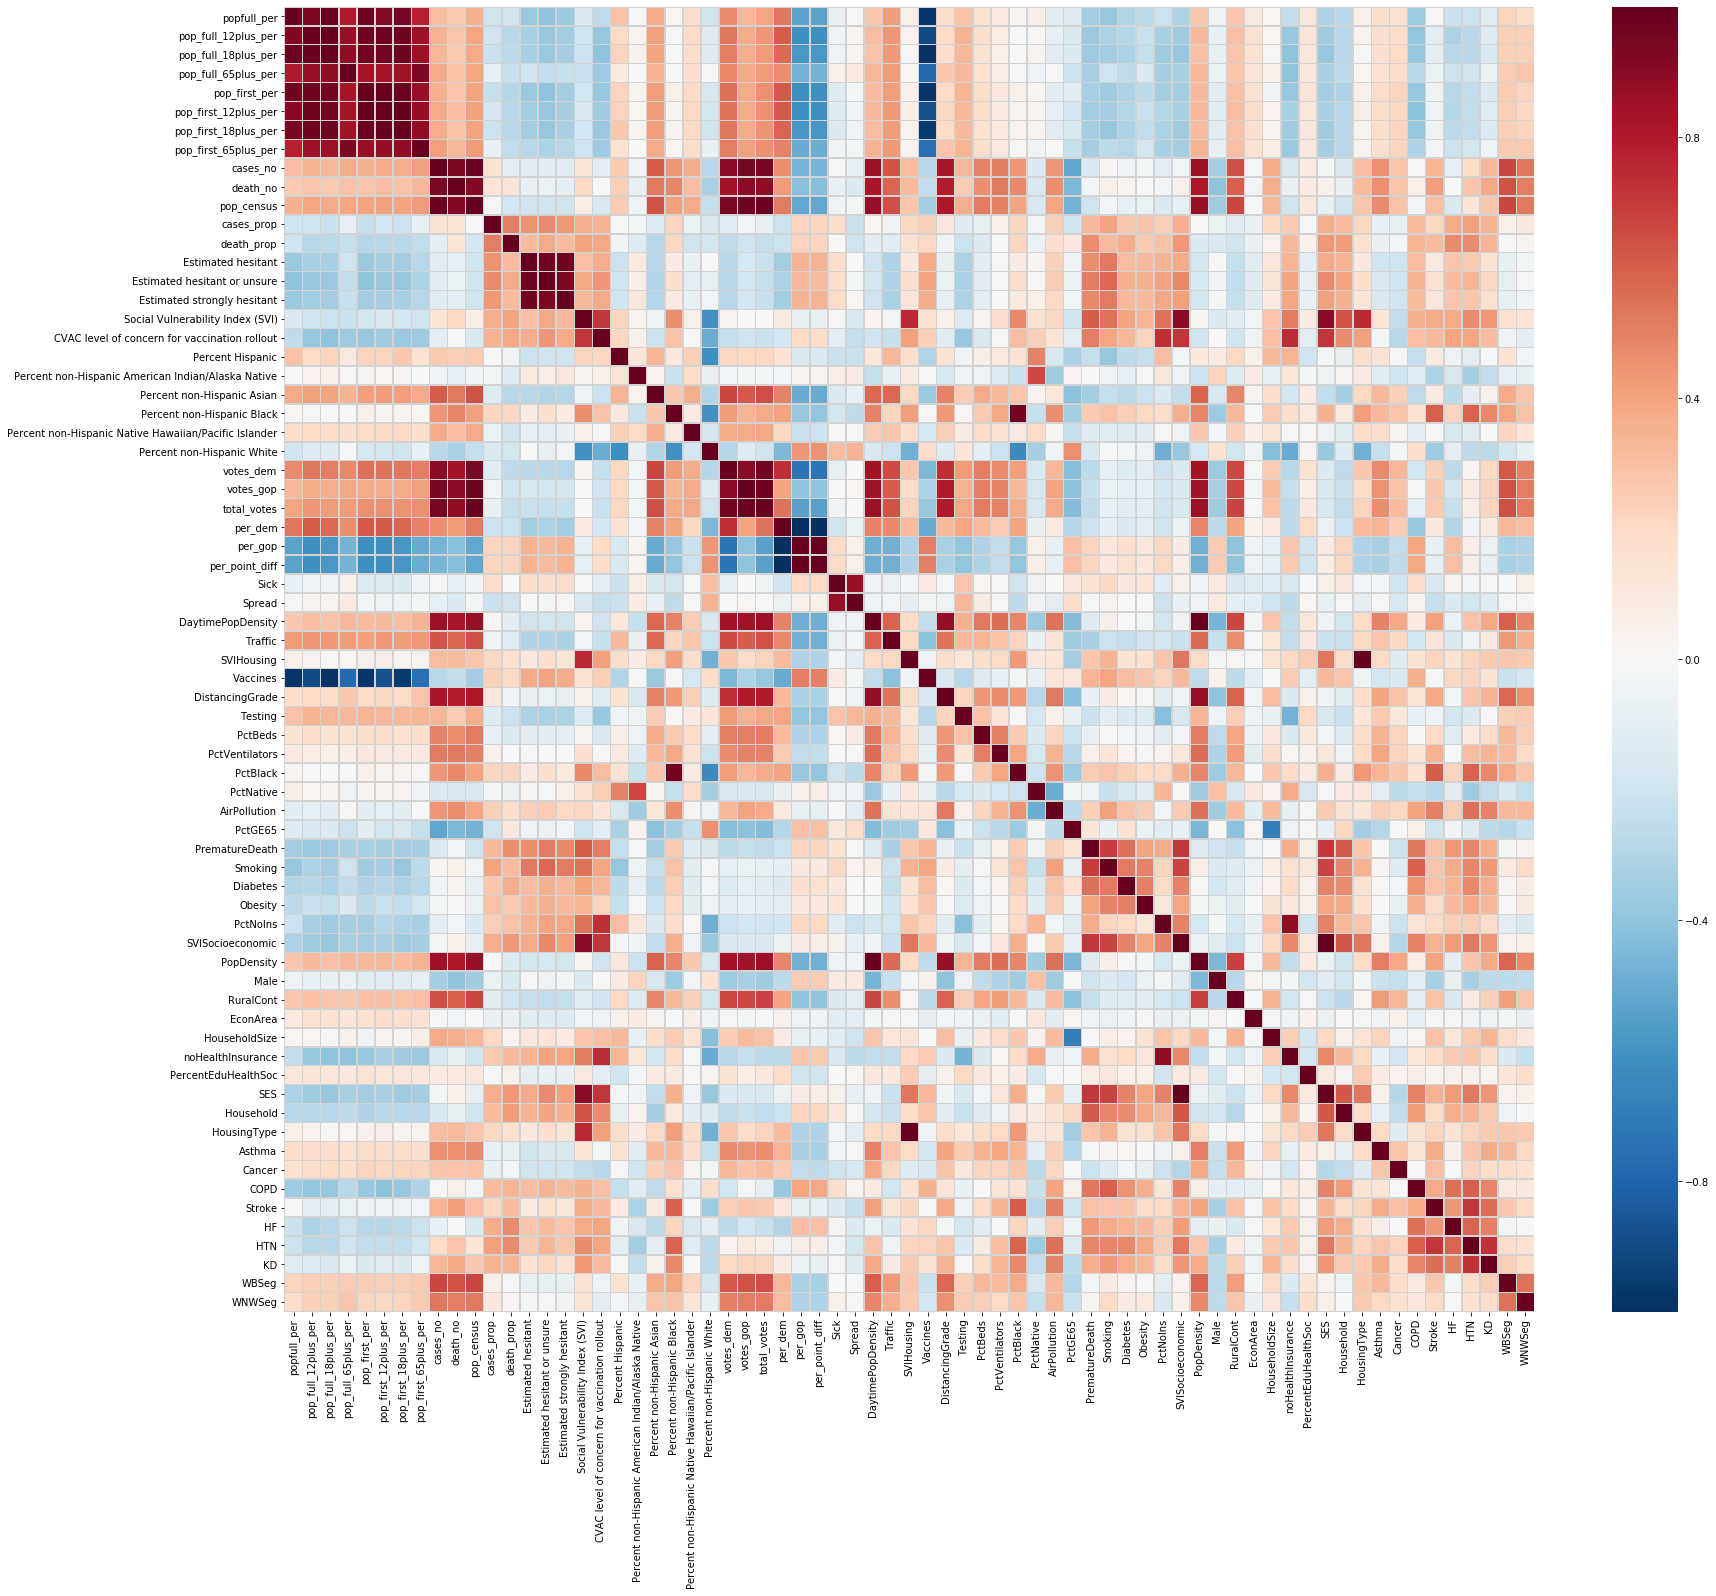

In [52]:
plt.figure(figsize=(28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(full_corr, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(69.0, 0.0)

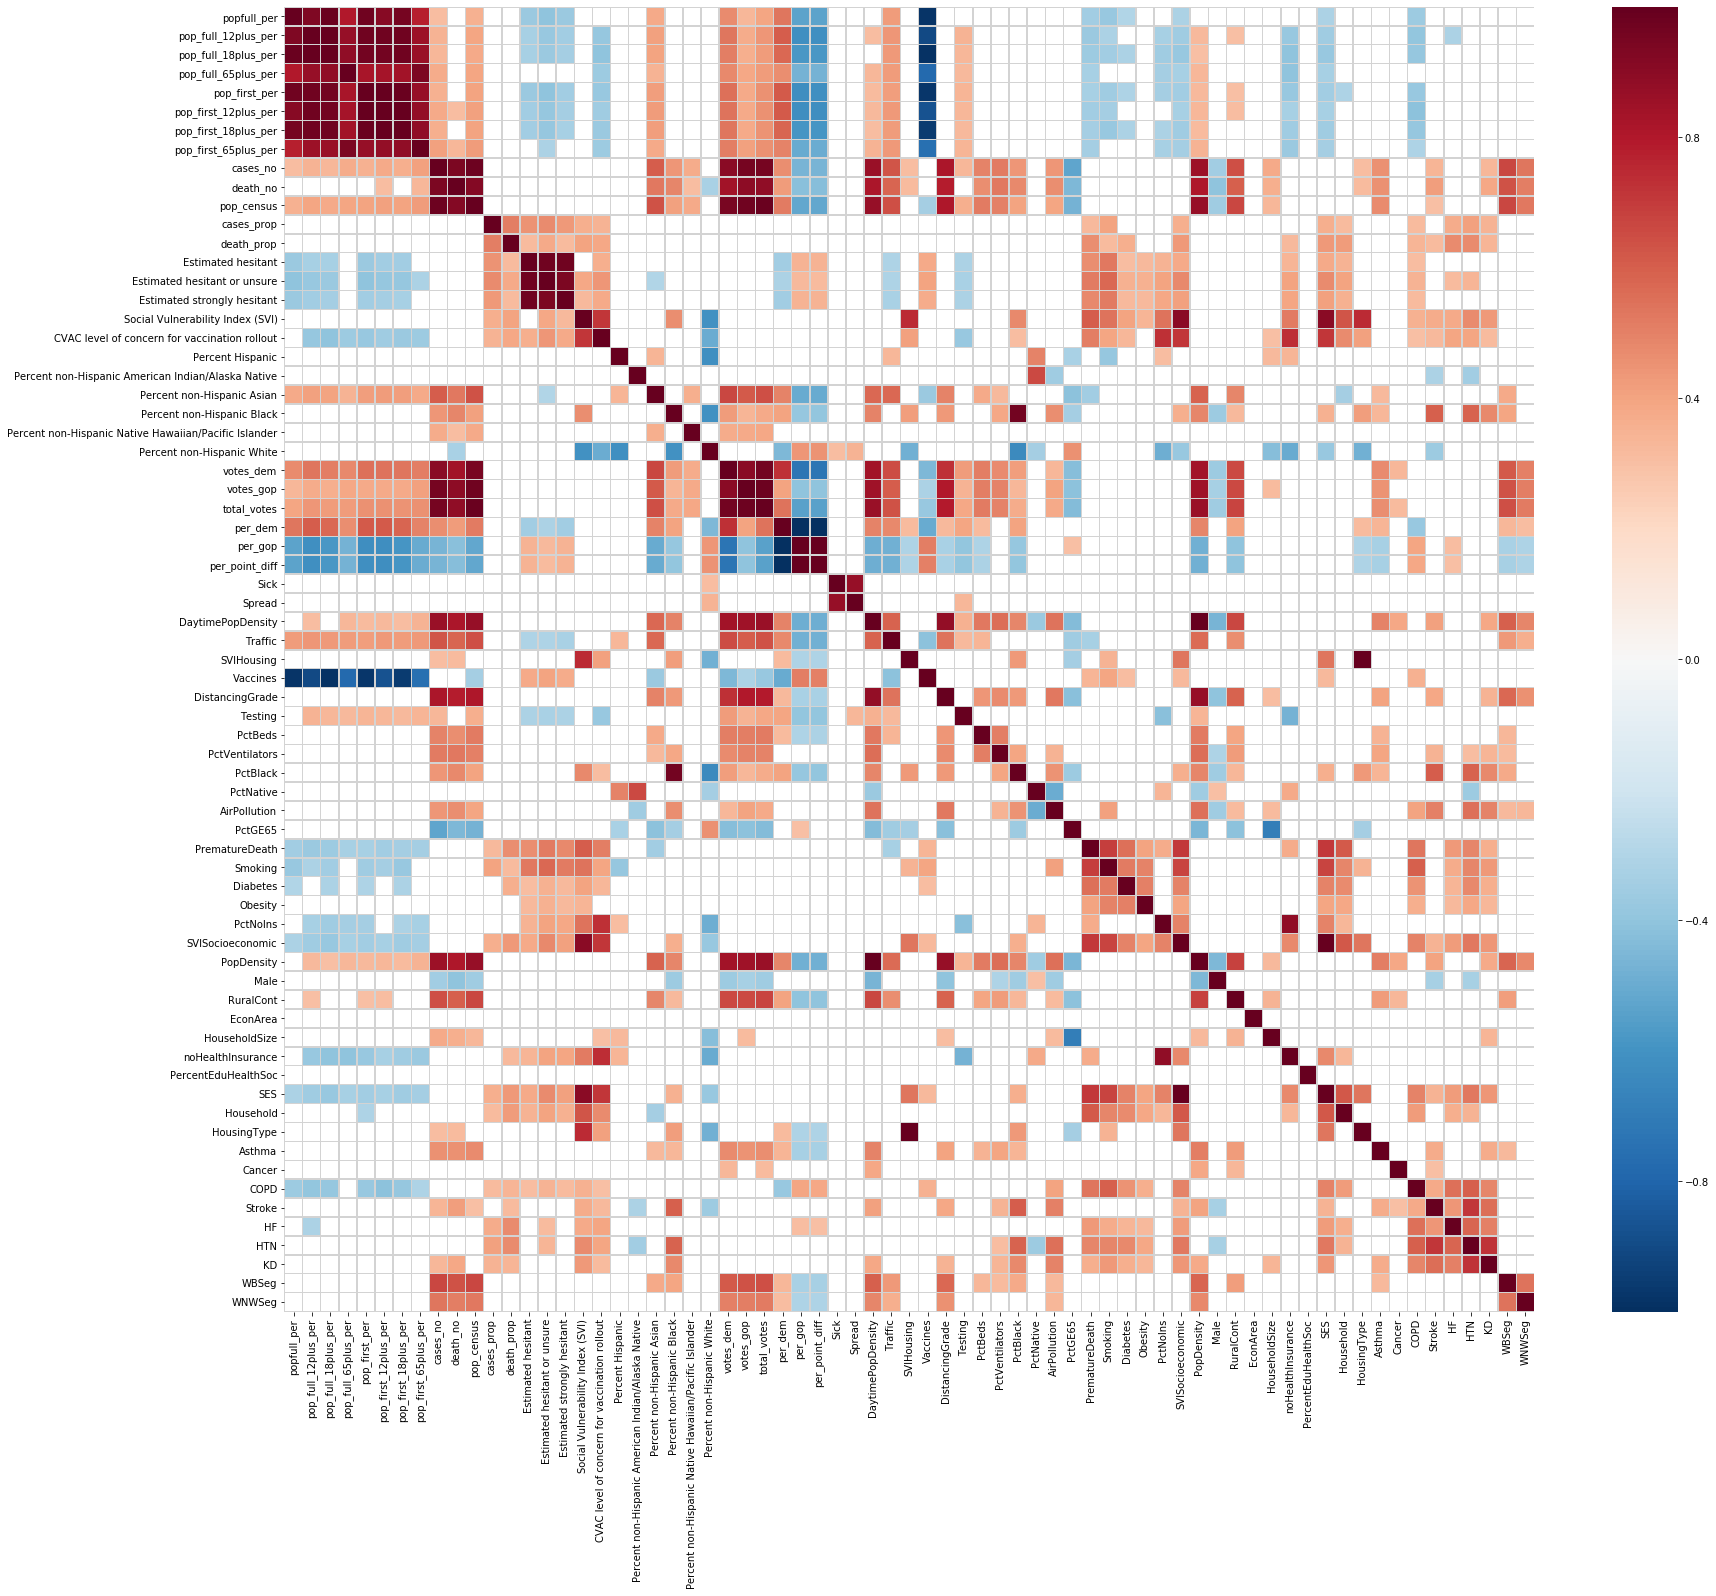

In [53]:
plt.figure(figsize=(28, 24))

color_map = plt.cm.get_cmap('RdBu')
reversed_col = color_map.reversed()

ax = sns.heatmap(corr_03, 
                      cmap = reversed_col, linewidths=.5,
                      linecolor = 'lightgrey')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Exclude `votes_dem` & `votes_gop` in favour of `per_gop` & `per_dem`?

In [54]:
print(full_corr[full_corr['pop_full_12plus_per'] > 0.3]['pop_full_12plus_per'])
print(full_corr[full_corr['pop_full_12plus_per'] < -0.3]['pop_full_12plus_per'])

popfull_per                   0.934304
pop_full_12plus_per           1.000000
pop_full_18plus_per           0.998140
pop_full_65plus_per           0.873957
pop_first_per                 0.968785
pop_first_12plus_per          0.972362
pop_first_18plus_per          0.971492
pop_first_65plus_per          0.858807
cases_no                      0.348968
pop_census                    0.393830
Percent non-Hispanic Asian    0.413728
votes_dem                     0.532006
votes_gop                     0.371586
total_votes                   0.441268
per_dem                       0.609006
DaytimePopDensity             0.311812
Traffic                       0.440394
Testing                       0.351668
PopDensity                    0.320794
RuralCont                     0.301666
Name: pop_full_12plus_per, dtype: float64
Estimated hesitant                              -0.333582
Estimated hesitant or unsure                    -0.374811
Estimated strongly hesitant                     -0.344389
CVAC

In [55]:
df_final.select_dtypes(include=['float64']).describe()

,popfull_per,pop_full_12plus_per,pop_full_18plus_per,pop_full_65plus_per,pop_first_per,pop_first_12plus_per,pop_first_18plus_per,pop_first_65plus_per,cases_no,death_no,...,HousingType,Asthma,Cancer,COPD,Stroke,HF,HTN,KD,WBSeg,WNWSeg
count,3129.000000,3084.000000,2875.000000,3129.000000,2734.000000,2857.000000,2648.000000,2902.000000,3.110000e+03,3082.000000,...,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,43.506775,49.363003,51.526017,70.764813,48.413314,56.566398,58.737613,77.906237,1.381745e+04,217.984750,...,0.499790,4.425902,7.462875,12.815024,3.413389,14.390064,56.407947,22.838763,30.065440,27.478058
std,12.917631,14.023480,14.315595,16.554344,13.543335,15.205891,15.404315,16.820001,4.599236e+04,787.307114,...,0.288901,1.136813,1.231224,3.697724,0.899478,3.209971,8.790211,4.446241,24.827902,15.576393
min,1.300000,1.500000,1.600000,2.900000,1.900000,2.300000,2.300000,4.100000,8.000000e+00,1.000000,...,0.000000,0.000000,2.444400,0.000000,0.000000,3.975500,25.939800,7.569700,0.040823,0.068236
25%,35.800000,41.000000,43.400000,64.000000,40.500000,47.300000,50.000000,71.500000,1.499250e+03,26.000000,...,0.249000,3.639100,6.678900,10.170100,2.756500,12.261100,51.133100,20.052100,1.000000,17.439766
50%,43.100000,48.900000,51.700000,73.600000,48.300000,56.100000,58.900000,80.900000,3.621500e+03,61.000000,...,0.499800,4.391600,7.432000,12.412300,3.362600,14.131200,58.246600,22.911700,33.296664,28.409603
75%,51.200000,58.000000,60.500000,81.700000,56.600000,65.600000,68.125000,88.700000,9.502250e+03,150.000000,...,0.749800,5.113800,8.251800,15.029600,4.006800,16.292800,62.709300,25.641600,50.668822,37.732539
max,100.000000,99.900000,99.900000,99.900000,99.900000,100.000000,99.900000,100.000000,1.463039e+06,26153.000000,...,1.000000,11.640200,12.101400,32.147300,9.458000,33.750000,74.946700,51.451600,88.732394,90.418870


In [56]:
df_final.columns

Index(['fips', 'state', 'county', 'state_abb', 'popfull_per',
       'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per',
       'pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per',
       'pop_first_65plus_per', 'cases_no', 'death_no', 'pop_census',
       'cases_prop', 'death_prop', 'Estimated hesitant',
       'Estimated hesitant or unsure', 'Estimated strongly hesitant',
       'Social Vulnerability Index (SVI)', 'SVI Category',
       'CVAC level of concern for vaccination rollout',
       'CVAC Level Of Concern', 'Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White', 'votes_dem', 'votes_gop', 'total_votes',
       'per_dem', 'per_gop', 'per_point_diff', 'Sick', 'Spread',
       'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Vaccines',
       'DistancingGrade', '

In [57]:
df_final.to_csv(dd+'/covid19_current_draft_data.csv', index = False)

### TO DO

- remove variables [pop_first_, votes_ etc.]
- check distribution + outliers + transform?
- calculate population density
- feature engineering - medical conditions?
- select top features & EDA 
- Viz